### Exploring fatalities and crashes across time
- Objective is to find operators with the highest number of crashes 
- Select top 5 and observe across decade

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [21]:
df = pd.read_json("data/silver/1920_2024.json")

In [22]:
df.head(5)

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,None,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,None,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,None,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane


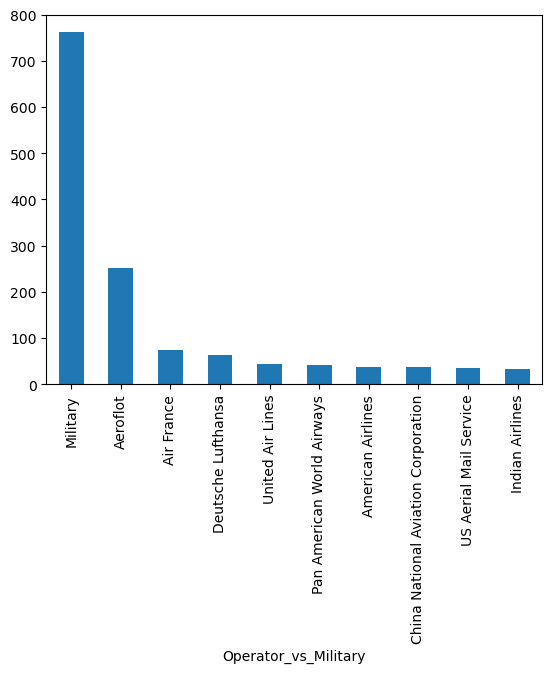

In [23]:
df.Operator_vs_Military.value_counts()[:10].plot(kind="bar")
pass 

In [24]:
df3 = df[df.Operator_vs_Military.apply(lambda x : x in df.Operator_vs_Military.value_counts()[:5].index)]

In [25]:
df3[df3.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum()

Decade
1930     87
1940    201
1950    230
1960    186
1970     56
1980    124
1990     26
2000    109
Name: Fatalities_Total, dtype: int64

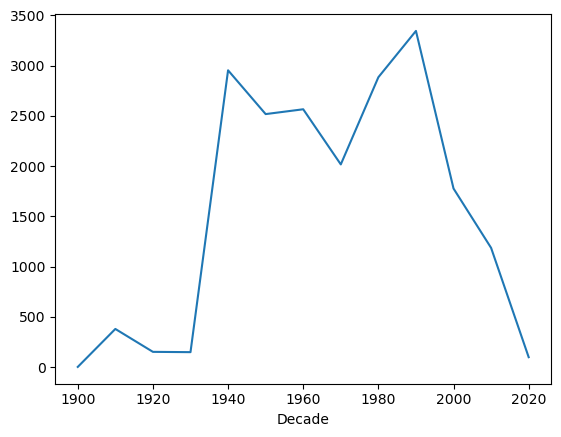

In [38]:
df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [42]:
df[(df.Operator_vs_Military == 'Military') & (df.Decade > 2000) & (df.Decade < 2020)]

32

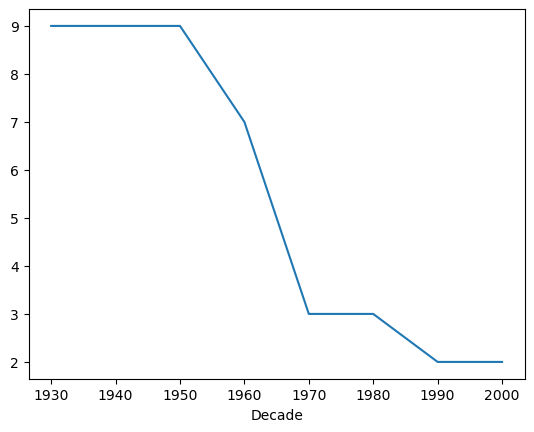

In [53]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Aboard_Total"].count().plot(x="Decade", y="Fatalities_Total")
pass

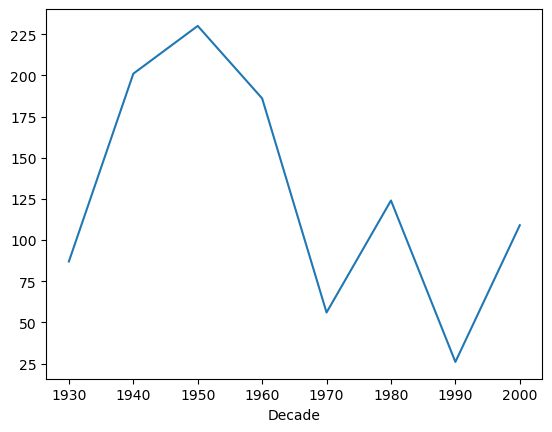

In [28]:
df[df.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
pass

In [ ]:
# # Plot for Operator A
# plt.figure(figsize=(10, 6))
# plt.plot(specific_operator[‘Decade’], specific_operator[‘Total Crashes’], marker=‘o’, linestyle=‘-’, color=‘b’, label=‘Operator A’)
# # Add the line for Operator B
# plt.plot(specific_operator_B[‘Decade’], specific_operator_B[‘Total Crashes’], marker=‘x’, linestyle=‘-’, color=‘r’, label=‘Operator B’)
# # Adding details
# plt.title(‘Total Crashes by Decade for Operators A and B’)
# plt.xlabel(‘Decade’)
# plt.ylabel(‘Total Crashes’)
# plt.legend()  # This adds the legend to differentiate the lines
# plt.grid(True)
# plt.xticks(specific_operator[‘Decade’])  # Ensure all decades are shown; adjust if necessary
# plt.show()

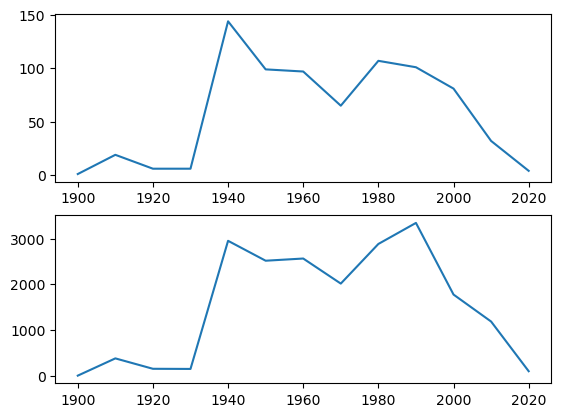

In [105]:
fig, ax = plt.subplots(2,1)
ax[1].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Fatalities_Total"].sum())
ax[0].plot(df[df.Operator_vs_Military == 'Military'].groupby(["Decade"])["Aboard_Total"].count())
pass


In [118]:
def to_plot_chart(x):
    fig, ax = plt.subplots(2,1)
    ax[1].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Fatalities_Total"].sum())
    ax[0].plot(df[df.Operator_vs_Military == x].groupby(["Decade"])["Aboard_Total"].count())

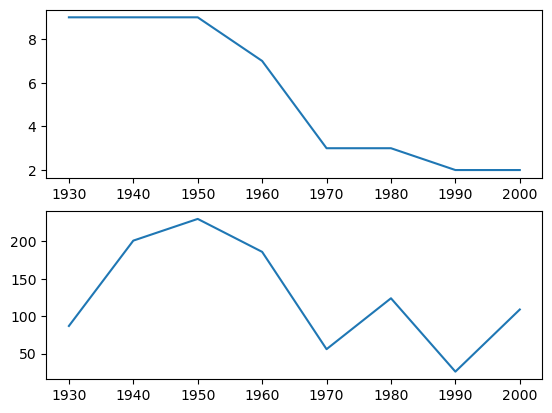

In [119]:
to_plot_chart('United Air Lines')

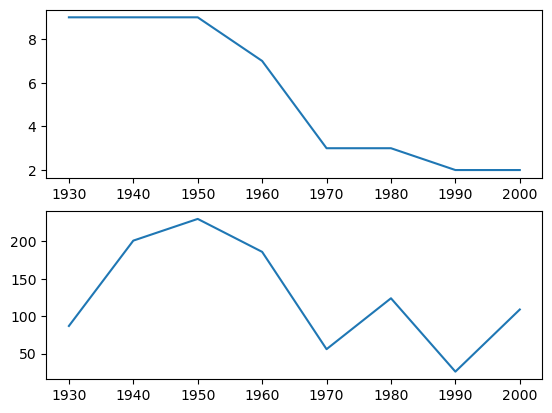

In [120]:
to_plot_chart('United Air Lines')

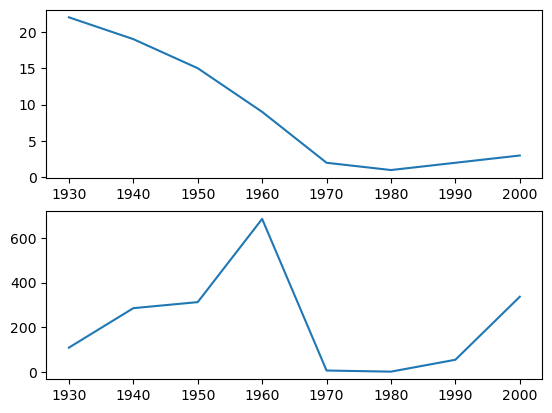

In [121]:
to_plot_chart('Air France')

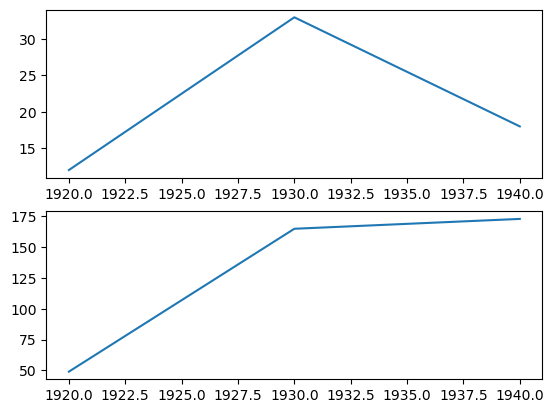

In [122]:
to_plot_chart('Deutsche Lufthansa')

In [127]:
df[(df.Operator == 'Deutsche Lufthansa')]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
590,1940,1944-01-15,1345,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Thessaloniki - Belgrade,Junkers JU-52/3m,D-ADQW,640610,"{'total': 5, 'passengers': 3, 'crew': 2}","{'total': 5, 'passengers': 3, 'crew': 2}",0.0,While approaching to land the aircraft was too...,5,5,Deutsche Lufthansa
594,1940,1944-02-21,1710,"Eubeoa, Greece",Deutsche Lufthansa,None,None,Junkers JU-52/3m,D-ABAS,6561,"{'total': 16, 'passengers': 13, 'crew': 3}","{'total': 16, 'passengers': 13, 'crew': 3}",0.0,"After radioing they were returning , the plane...",16,16,Deutsche Lufthansa
597,1940,1944-04-17,None,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Vienna - Belgrade - Sofia - Thessaloniki - Athens,Junkers JU-52/3m,D-AOCA,640996,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 5, 'passengers': 4, 'crew': 1}",0.0,Shot down by allied fighters.,7,5,Deutsche Lufthansa
598,1940,1944-04-21,None,"Frederikstad, Norway",Deutsche Lufthansa,None,Copenhagen - Oslo,Douglas DC-3,D-AAIG,2095,"{'total': 20, 'passengers': 17, 'crew': 3}","{'total': 9, 'passengers': 6, 'crew': 3}",0.0,Crashed 50 miles from its destination after a...,20,9,Deutsche Lufthansa
620,1940,1944-09-02,None,"Belgrad, Yugoslavia",Deutsche Lufthansa,None,Athens - Sofia - Belgrade - Vienna,Junkers JU52/3m,D-AUAW,641039,"{'total': 5, 'passengers': 2, 'crew': 3}","{'total': 5, 'passengers': 2, 'crew': 3}",0.0,Shot down by allied fighters.,5,5,Deutsche Lufthansa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,1920,1928-09-06,None,"Heroldbach, Germany",Deutsche Lufthansa,None,None,Fokker FG III,D-180,1531,"{'total': 3, 'passengers': 2, 'crew': 1}","{'total': 3, 'passengers': 2, 'crew': 1}",0.0,Crashed due to engine failure.,3,3,Deutsche Lufthansa
3260,1920,1928-12-11,None,"Letzlingen, Germany",Deutsche Lufthansa,None,Cologne - Berlin,Junkers G-31,D-1473,3005,"{'total': 4, 'passengers': 1, 'crew': 3}","{'total': 3, 'passengers': 0, 'crew': 3}",0.0,"After a fuel line broke in flight, the pilot w...",4,3,Deutsche Lufthansa
3450,1920,1929-08-24,None,"Elm, Germany",Deutsche Lufthansa,None,Frankfurt - Berlin,Fokker FG II,D-757,1571,"{'total': 5, 'passengers': 4, 'crew': 1}","{'total': 4, 'passengers': 3, 'crew': 1}",0.0,The aorcraft hit a hill in fog and poor visibi...,5,4,Deutsche Lufthansa
3463,1920,1929-11-06,1010,"Near Godstone, Surrey, England",Deutsche Lufthansa,None,Croyden - Amsterdam - Berlin,Junkers G-24,D-903,911,"{'total': 8, 'passengers': 4, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,After the plane's antenna wire struck the grou...,8,7,Deutsche Lufthansa


In [29]:
df[(df.Operator == 'United Air Lines') & (df.Decade > 1990)]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
2759,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,"{'total': 65, 'passengers': 56, 'crew': 9}","{'total': 65, 'passengers': 56, 'crew': 9}",2750.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines
2760,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,"{'total': 44, 'passengers': 37, 'crew': 7}","{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines


In [30]:
df.Operator.value_counts()[:5]

Operator
Aeroflot                     252
Military - U.S. Air Force    141
Air France                    73
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64

For the two plains in 9/11 the ground was counted twice
- We split the count into two 2750 / 2 

In [31]:
print(df.iloc[2759].Ground / 2)
df.loc[2758, "Ground"] = 1375
df.loc[2759, "Ground"] = 1375

0.0


Compare Data source with wiki to cross reference dates and fatalities 

In [32]:
df[df.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
2757,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,"{'total': 64, 'passengers': 58, 'crew': 6}","{'total': 64, 'passengers': 58, 'crew': 6}",125.0,The aircraft was hijacked after taking off fro...,64,64,American Airlines
2758,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,"{'total': 92, 'passengers': 81, 'crew': 11}","{'total': 92, 'passengers': 81, 'crew': 11}",1375.0,The aircraft was hijacked shortly after it lef...,92,92,American Airlines
2759,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,"{'total': 65, 'passengers': 56, 'crew': 9}","{'total': 65, 'passengers': 56, 'crew': 9}",1375.0,The aircraft was hijacked shortly after it lef...,65,65,United Air Lines
2760,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,"{'total': 44, 'passengers': 37, 'crew': 7}","{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...,44,44,United Air Lines


In [33]:
df[df.Date == "1977-03-27"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
4639,1970,1977-03-27,1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,"{'total': 644, 'passengers': 614, 'crew': 30}","{'total': 583, 'passengers': 560, 'crew': 23}",0.0,Both aircraft were diverted to Tenerife becaus...,644,583,Pan American World Airways / KLM


In [34]:
df.Date.value_counts()[df.Date.value_counts() > 1]
# Good to know that we can have more than one crash in a single day

Date
2001-09-11    4
1988-08-31    4
1962-11-23    3
1970-12-31    3
1947-05-29    3
             ..
1966-01-01    2
1947-10-16    2
2001-10-10    2
1973-09-30    2
1998-01-13    2
Name: count, Length: 398, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 0 to 5036
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Decade                5020 non-null   int64         
 1   Date                  5020 non-null   datetime64[ns]
 2   Time                  3528 non-null   object        
 3   Location              5015 non-null   object        
 4   Operator              5009 non-null   object        
 5   Flight_Num            1340 non-null   object        
 6   Route                 4270 non-null   object        
 7   Ac_Type               5007 non-null   object        
 8   Registration          4754 non-null   object        
 9   Cn_Ln                 4364 non-null   object        
 10  Aboard                5020 non-null   object        
 11  Fatalities            5020 non-null   object        
 12  Ground                4988 non-null   float64       
 13  Summary               4